## Time Series Analysis

> https://www.youtube.com/playlist?list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK

---

### Key concepts

- trends
- seasonality
- cyclic
- stationary

__Trend__:

![](https://imgur.com/ed8vpey.png)

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. 

__Seasonality__:

A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a __fixed and known frequency__. The monthly sales of antidiabetic drugs above shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.


Examples

- every weekend or every holiday sales may go up
- every weekday 9am-12 pm traffic may increase


Seasonal - this pattern will generalize in future

Cyclic - say gold price suddenly spiked in Nov due to some govt policy - hard

__Types of seasonanlity__:

![](https://imgur.com/wrXksuy.png)

The fig on top left is __additive seasonality__ - we can see that there is seasonality but the __magnitude__ of the 
seasononality is constant

In the 2nd fig (top right) - there is a positive trend, but seasonality magnitude is constant

bottom left - no trend, but seasonality has an increasing pattern

bottom right - increasing trend, increasing seasonality



__Cyclic__:

A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.


Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitudes of cycles tend to be more variable than the magnitudes of seasonal patterns.

![](https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png)

![](https://imgur.com/l5py41O.png)


__Stationary__:

Data is stationary when

- mean is const
- std is const
- no seasonality/trends (even if this is not met v strictly there are techniques)

![](https://imgur.com/LqYZ3L0.png)

Top right plot - mean is const, std is const

Data is fluctuating, but around a const mean

There are some seasonal aspects but not v strong, also no trend

ADF test value also tells that the TS is stationary


Top right - NOT centered around mean, mean not const, dec trend

Left plot - white noise - no autocorrelation - basically means that there is no corr bw a time to its 
any prev time periods







In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from download import download

In [2]:
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False

In [ ]:
download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_21030301-20170228.zip'

In [6]:
fpath = "/Users/shaunaksen/Documents/personal-projects/DS-ML-Concepts/Time Series Analysis/Tutorial series - AIEngineering/data/PRSA_Data_Dingling_20130301-20170228.csv"

In [7]:
df = pd.read_csv(fpath, encoding='ISO-8859-1')

In [8]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


- hour level data
- PM10  particulate matter <=10 micrometer in diameter
- PM2.5 particulate matter <=2.5 micrometer in diameter
- these are main air pollutants

full data desc:

```
year: year of data in this row 
month: month of data in this row 
day: day of data in this row 
hour: hour of data in this row 
PM2.5: PM2.5 concentration (ug/m^3)
PM10: PM10 concentration (ug/m^3)
SO2: SO2 concentration (ug/m^3)
NO2: NO2 concentration (ug/m^3)
CO: CO concentration (ug/m^3)
O3: O3 concentration (ug/m^3)
TEMP: temperature (degree Celsius) 
PRES: pressure (hPa)
DEWP: dew point temperature (degree Celsius)
RAIN: precipitation (mm)
wd: wind direction
WSPM: wind speed (m/s)
station: name of the air-quality monitoring site
```

In [9]:
def column_summary(df):
    """
    util function to do some basic analysis on the columns of a df
    """
    summary = []

    for col in df.columns:
        dtype = df[col].dtype
        null_percentage = (df[col].isnull().sum() / len(df)) * 100

        if dtype == 'object':
            category_distribution = df[col].value_counts(dropna=False).to_dict()
            min_val = max_val = mean_val = median_val = None
        else:
            category_distribution = None
            min_val = df[col].min()
            max_val = df[col].max()
            mean_val = df[col].mean()
            median_val = df[col].median()

        summary.append({
            'Column': col,
            'Data Type': dtype,
            'Null Percentage': null_percentage,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val,
            'Median': median_val,
            'Category Distribution': category_distribution
        })

    return pd.DataFrame(summary)

In [10]:
column_summary(df)

,Column,Data Type,Null Percentage,Min,Max,Mean,Median,Category Distribution
0,No,int64,0.000000,1.0000,35064.0,17532.500000,17532.5,None
1,year,int64,0.000000,2013.0000,2017.0,2014.662560,2015.0,None
2,month,int64,0.000000,1.0000,12.0,6.522930,7.0,None
3,day,int64,0.000000,1.0000,31.0,15.729637,16.0,None
4,hour,int64,0.000000,0.0000,23.0,11.500000,11.5,None
5,PM2.5,float64,2.221652,3.0000,881.0,65.989497,41.0,None
6,PM10,float64,1.870865,2.0000,905.0,83.739723,60.0,None
7,SO2,float64,2.081907,0.2856,156.0,11.749650,5.0,None
8,NO2,float64,3.519279,1.0265,205.0,27.585467,19.0,None
9,CO,float64,5.738079,100.0000,10000.0,904.896073,600.0,None


In [13]:
df['year_month_day_hour'] = df['year'].astype(str) + " " + df['month'].astype(str) + " " + df['day'].astype(str) + " " + df['hour'].astype(str) 

In [14]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013 3 1 0
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013 3 1 1
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013 3 1 2
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013 3 1 3
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013 3 1 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017 2 28 19
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017 2 28 20
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017 2 28 21
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017 2 28 22


In [15]:
def convert_to_date(x):
    return datetime.strptime(x, "%Y %m %d %H")

In [16]:
df['year_month_day_hour'] = df['year_month_day_hour'].apply(lambda x: convert_to_date(x))

In [17]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


In [18]:
df.dtypes

No                              int64
year                            int64
month                           int64
day                             int64
hour                            int64
PM2.5                         float64
PM10                          float64
SO2                           float64
NO2                           float64
CO                            float64
O3                            float64
TEMP                          float64
PRES                          float64
DEWP                          float64
RAIN                          float64
wd                             object
WSPM                          float64
station                        object
year_month_day_hour    datetime64[ns]
dtype: object

#### We set index so that querying is faster

In [19]:
df = df.set_index('year_month_day_hour')

In [20]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [22]:
df.loc['2013-03-01': '2013-03-02'].tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-02 19:00:00,44,2013,3,2,19,46.0,64.0,36.0,80.0,1000.0,11.0,0.3,1020.0,-15.3,0.0,NE,0.6,Dingling
2013-03-02 20:00:00,45,2013,3,2,20,45.0,66.0,30.0,79.0,1200.0,6.0,0.0,1019.9,-15.2,0.0,NE,0.2,Dingling
2013-03-02 21:00:00,46,2013,3,2,21,50.0,68.0,36.0,82.0,1200.0,4.0,-1.2,1019.7,-13.7,0.0,N,1.0,Dingling
2013-03-02 22:00:00,47,2013,3,2,22,56.0,73.0,26.0,76.0,1200.0,4.0,-2.1,1019.1,-13.3,0.0,NNE,0.4,Dingling
2013-03-02 23:00:00,48,2013,3,2,23,55.0,66.0,25.0,76.0,1200.0,3.0,-2.2,1018.2,-13.4,0.0,NNE,1.1,Dingling


In [23]:
df.loc['2013': '2015'].tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling
2015-12-31 22:00:00,24863,2015,12,31,22,93.0,93.0,28.0,76.0,3500.0,2.0,-2.9,1020.4,-9.8,0.0,NNW,1.3,Dingling
2015-12-31 23:00:00,24864,2015,12,31,23,98.0,98.0,25.0,75.0,3600.0,2.0,-3.5,1020.2,-9.7,0.0,NNW,1.3,Dingling


In [30]:
rcParams['figure.figsize'] = (20, 20)
rcParams['axes.grid'] = False

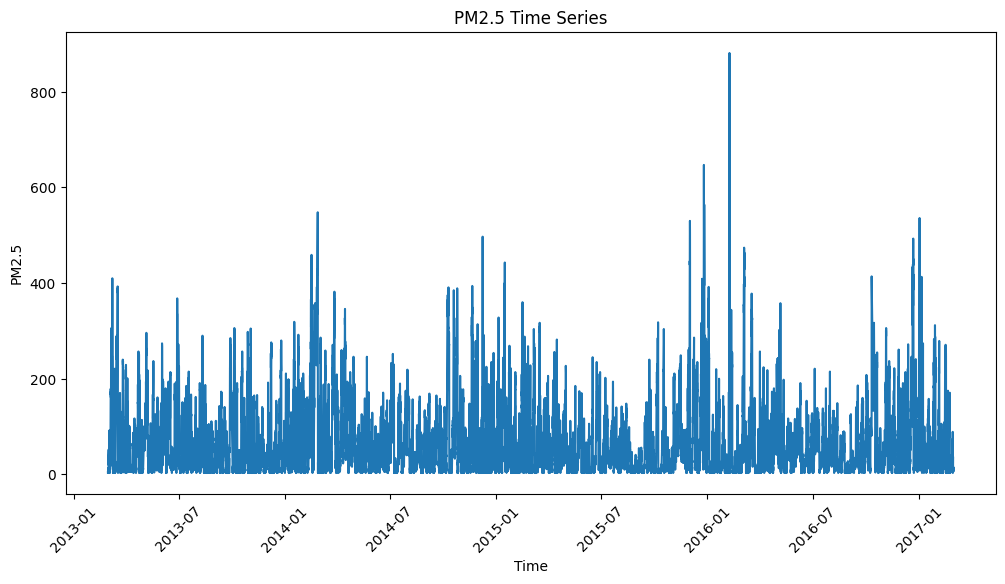

In [32]:
plt.figure(figsize=(12, 6))  # Adjust the values as per your preference

# Create the time series plot using Seaborn
sns.lineplot(data=df, x=df.index, y='PM2.5')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Set labels and title
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('PM2.5 Time Series')

# Show the plot
plt.show()

- there are some spikes in the beiginning of the year
- but its hard to visualize properly

- lets do this for 1 year

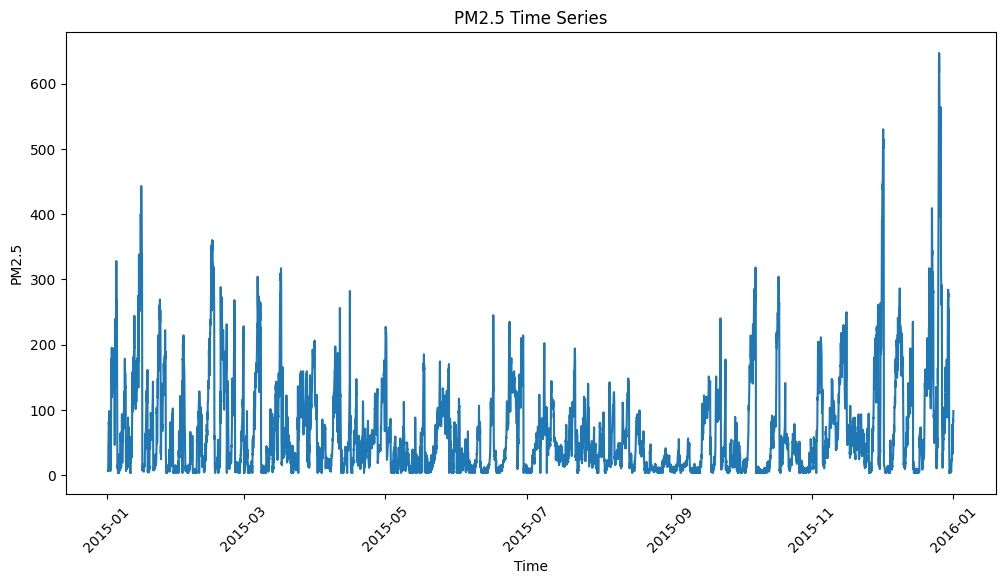

In [34]:
plt.figure(figsize=(12, 6))  # Adjust the values as per your preference

# Create the time series plot using Seaborn
sns.lineplot(data=df.loc["2015"], x=df.loc["2015"].index, y='PM2.5')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Set labels and title
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('PM2.5 Time Series')

# Show the plot
plt.show()

In [37]:
df.head(30)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
2013-03-01 05:00:00,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
2013-03-01 06:00:00,7,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
2013-03-01 07:00:00,8,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
2013-03-01 08:00:00,9,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling


In [39]:
df['PM2.5'].rolling(window=5, center=True, min_periods=1).sum().head(10)

year_month_day_hour
2013-03-01 00:00:00    16.0
2013-03-01 01:00:00    22.0
2013-03-01 02:00:00    27.0
2013-03-01 03:00:00    29.0
2013-03-01 04:00:00    27.0
2013-03-01 05:00:00    27.0
2013-03-01 06:00:00    29.0
2013-03-01 07:00:00    32.0
2013-03-01 08:00:00    34.0
2013-03-01 09:00:00    32.0
Name: PM2.5, dtype: float64

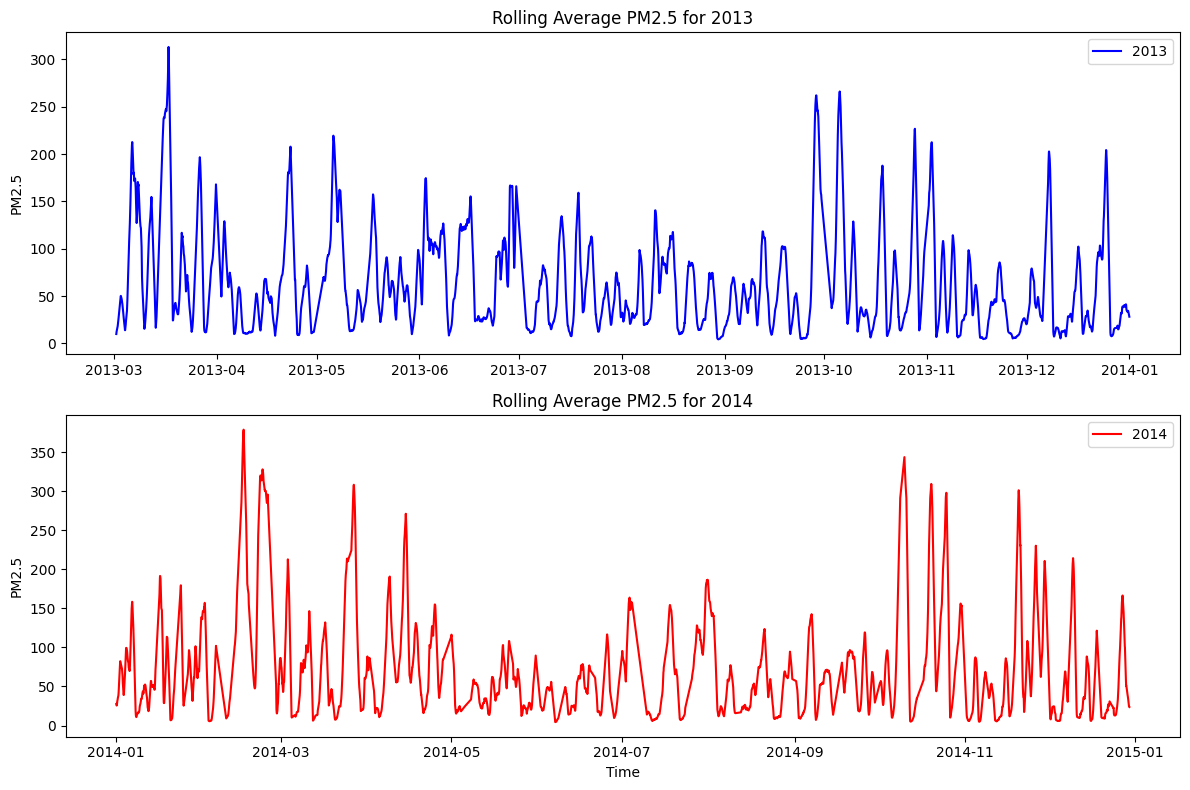

In [36]:
# Compute daily rolling averages with a center window
rolling_avg = df['PM2.5'].rolling(window=31, center=True).mean()

# Filter data for the years 2013 and 2014
df_2013 = rolling_avg['2013-01-01':'2013-12-31']
df_2014 = rolling_avg['2014-01-01':'2014-12-31']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
sns.lineplot(data=df_2013, label='2013', color='blue')
plt.title('Rolling Average PM2.5 for 2013')
plt.xlabel('')
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
sns.lineplot(data=df_2014, label='2014', color='red')
plt.title('Rolling Average PM2.5 for 2014')
plt.xlabel('Time')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()